In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path='/content/drive/MyDrive/walmart Retail Data.xlsx'
data=pd.read_excel(path)
data.describe()

,Customer Age,Discount,Number of Records,Order Date,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,Ship Date,Shipping Cost,Unit Price,Zip Code
count,7496.000000,8399.000000,8399.0,8399,8399.000000,8399.000000,8336.000000,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,8399.000000
mean,54.542823,0.049671,1.0,2013-12-24 18:31:30.225026560,29965.179783,25.571735,0.512513,181.184422,4200.000000,1775.878179,2013-12-26 19:17:37.411596544,12.838557,89.346259,52839.139421
min,41.000000,0.000000,1.0,2012-01-01 00:00:00,3.000000,1.000000,0.350000,-14140.701600,1.000000,2.240000,2012-01-02 00:00:00,0.490000,0.990000,1001.000000
25%,47.000000,0.020000,1.0,2012-12-20 00:00:00,15011.500000,13.000000,0.380000,-83.315000,2100.500000,143.195000,2012-12-22 12:00:00,3.300000,6.480000,30337.000000
50%,53.000000,0.050000,1.0,2013-12-17 00:00:00,29857.000000,26.000000,0.520000,-1.500000,4200.000000,449.420000,2013-12-18 00:00:00,6.070000,20.990000,52732.000000
75%,61.000000,0.080000,1.0,2015-01-01 12:00:00,44596.000000,38.000000,0.590000,162.748000,6299.500000,1709.320000,2015-01-03 12:00:00,13.990000,85.990000,77577.000000
max,95.000000,0.250000,1.0,2015-12-30 00:00:00,59973.000000,50.000000,0.850000,27220.690000,8399.000000,89061.050000,2015-12-30 00:00:00,164.730000,6783.020000,99362.000000
std,9.519435,0.031823,0.0,NaN,17260.883447,14.481071,0.135589,1196.653326,2424.726789,3585.050525,NaN,17.264052,290.354383,28509.535635


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Assuming 'data' is your pandas DataFrame
model = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
model.fit(data[['Sales']]) # Assuming you're looking for anomalies in 'Weekly_Sales'

IsolationForest(contamination=0.05, random_state=42)

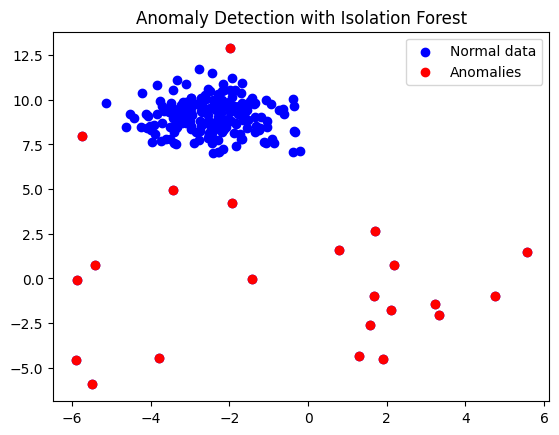

In [10]:
# Install necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Create a synthetic dataset with normal and anomalous data points
data, _ = make_blobs(n_samples=200, centers=1, cluster_std=1.0, random_state=42)

# Add some random anomalies (outliers) to the dataset
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))  # 20 outliers
data_with_outliers = np.vstack([data, outliers])

# Visualize the dataset with anomalies
#plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], color='blue', label='Normal data')
#plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Anomalies')
#plt.title("Data with Anomalies (Outliers)")
#plt.legend()
#plt.show()

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model on the data
iso_forest.fit(data_with_outliers)

# Predict anomalies (1 for normal, -1 for anomalies)
predictions = iso_forest.predict(data_with_outliers)

# Visualize the results
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], color='blue', label='Normal data')
plt.scatter(data_with_outliers[predictions == -1][:, 0], data_with_outliers[predictions == -1][:, 1], color='red', label='Anomalies')
plt.title("Anomaly Detection with Isolation Forest")
plt.legend()
plt.show()
